# Dimensionality Reduction Concepts

## Importing Libs

In [22]:
# Standard libs
import numpy as np

# Datasets libs
from sklearn.datasets import fetch_openml

# Dataviz libs
import matplotlib.pyplot as plt

# Dimensionality Reduction libs
from sklearn.decomposition import PCA

## Loading the MNIST set

In [9]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Just seeing a handwritten number.

In [10]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# print the first line
X.loc[1]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 1, Length: 784, dtype: float64

In [12]:
# label
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [13]:
X = X.to_numpy()
y = y.to_numpy()

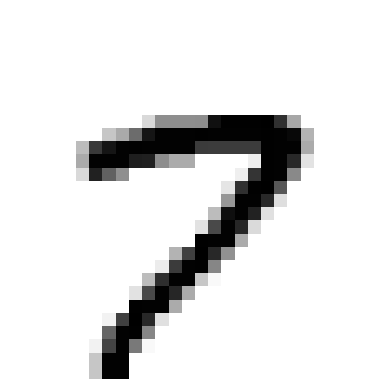

In [14]:
plt.imshow(X[123].reshape(28, 28), cmap='binary')
plt.axis('off');

In [15]:
# Visualizing the array of characteristics of the handwritten number.
print(X[123])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

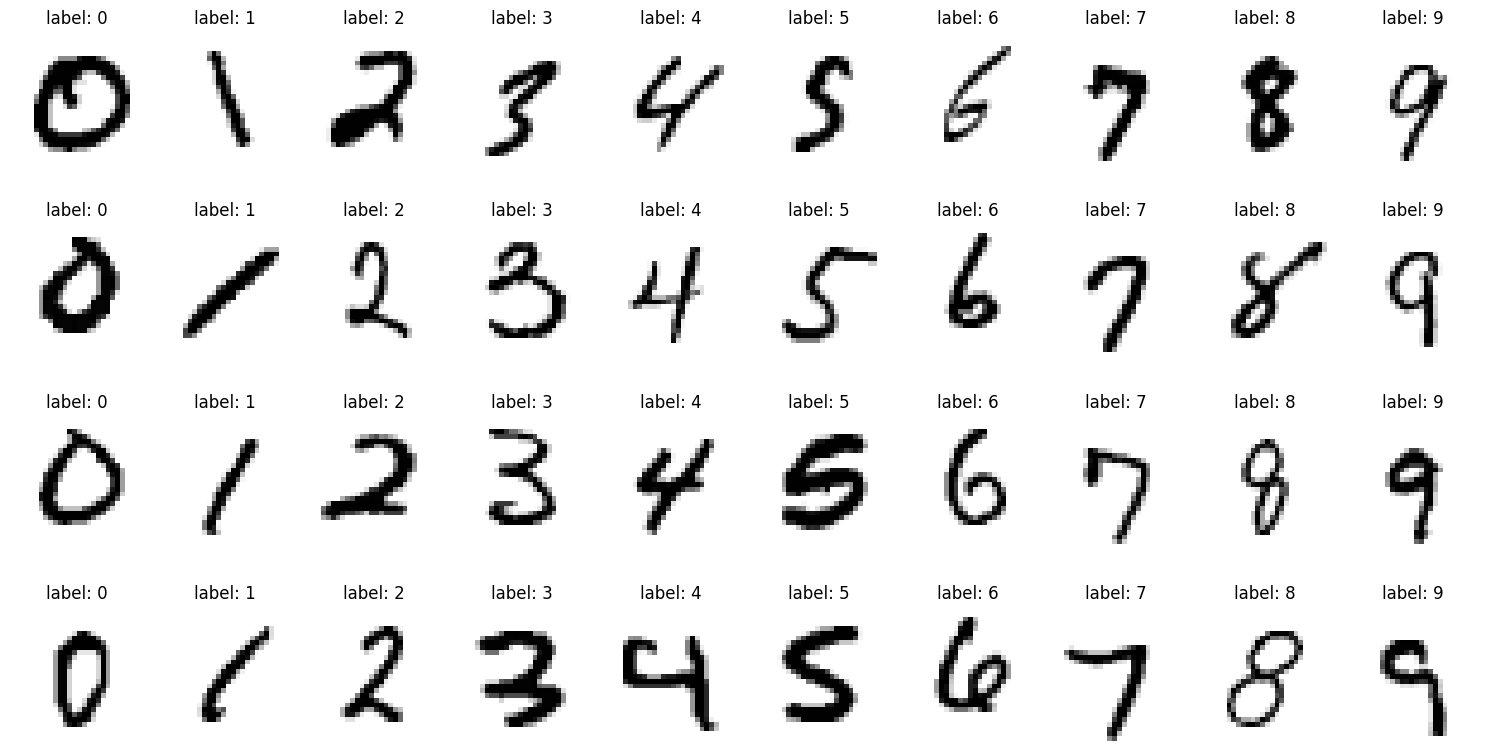

In [16]:
n_distinct_digits = 10
n_samples_for_each_distinct_digits = 4

num_row = n_samples_for_each_distinct_digits
num_col = n_distinct_digits

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row), sharex=True, sharey=True)

for i in range(n_distinct_digits):
    n_random_digits_for_each_distinct_digit = np.random.choice(np.where(y == str(i))[0], size=n_samples_for_each_distinct_digits)
    for idx, j in enumerate(n_random_digits_for_each_distinct_digit):
        axes[idx][i].imshow(X[j].reshape(28, 28), cmap='binary')
        axes[idx][i].set_title('label: {}'.format(y[j]))
        # Turn off tick labels
        axes[idx][i].axis("off")

plt.tight_layout()
plt.show()

## PCA

### Generating data

The data was generated according to the steps below. These steps were based on chapter 8 of the book Hands On: Machine Learning with Scikit-Learn & TensorFlow by Aurelien Geron, 2019, O'Reilly.

In [17]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X_train = np.empty((m, 3))
X_train[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X_train[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X_train[:, 2] = X_train[:, 0] * w1 + X_train[:, 1] * w2 + noise * np.random.randn(m)

In [18]:
X_train[:1]

array([[-1.01570027, -0.55091331, -0.26132626]])

### Manual calculation

1. Calculate the main components

In [19]:
X_train_centered = X_train - X_train.mean(axis=0)
U, s, Vt = np.linalg.svd(X_train_centered)

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

2. Projetar

In [20]:
W2 = Vt.T[:, :2]
X2D = X_train_centered.dot(W2)

In [21]:
X2D[:4]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856]])

### Calculation with Scikit-Learn

In [23]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X_train)

### Taxa de variância explicada

In [24]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [25]:
# third axis
1 - sum(pca.explained_variance_ratio_)

0.011195535570688975

### Choosing the number of dimensions via 95% variance

In [26]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [27]:
X_reduced[:4]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856]])

### Choosing the number of dimensions using the cumulative explained variance curve

To test this method we will use the MNIST database with just 10,000 images of handwritten digits.

In [28]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [29]:
X_train = X[:10000]
y_train = y[:10000]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

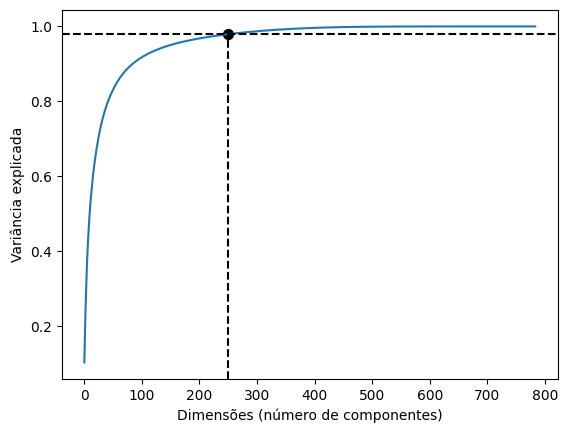

In [30]:
pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.axvline(x=250, ymax=0.95, ls='--', color='black')
plt.axhline(y=0.98, xmax=750, ls='--', color='black')
plt.scatter(250, 0.98, s=50, c='black')
plt.xlabel('Dimensões (número de componentes)')
plt.ylabel('Variância explicada');

### PCA para compressão

In [31]:
# Let's consider 154 dimensions, considering only 20% of the original set.
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

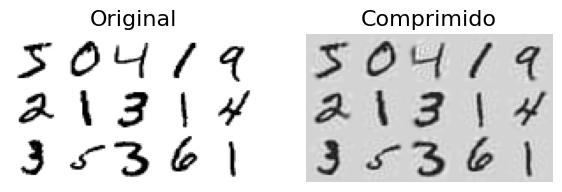

In [33]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[:15])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[:15])
plt.title("Comprimido", fontsize=16);

In [ ]:
#